# Process Binder data

In [1]:
%load_ext autoreload
%autoreload 2
%run ~/FKMC/notebooks/notebook_preamble.py
%matplotlib inline
np.seterr(under = 'ignore')
from time import time
from munch import munchify

Imported pathlib::Path, os, munch::Munch, pickle, logging, itertools::count, matplotlib::colors
Names are pyplot = plt, matplotlib = mpl, numpy = np


In [2]:
import numpy as np
from time import time
from operator import mul
from functools import reduce
from itertools import count
from munch import Munch
from itertools import zip_longest
import logging
import multiprocessing as mp

import re
from pathlib import Path

import scipy
from FKMC.general import index_histogram_array, sort_IPRs, smooth, shapes, normalise_IPR
from FKMC.import_funcs import shape_hints, timefmt

from FKMC.import_funcs import  mean_over_MCMC, IPRandDOS, extract, get_data_funcmap_chain_ext

In [3]:
%%time
logging.basicConfig()
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

oTsweep_fullrange = get_data_funcmap_chain_ext(Path('~/HPC_data/Tsweep3_full'),
            functions = [
                mean_over_MCMC('Mf_moments', N_error_bins = 10),
                            ],
            )

DEBUG:FKMC.import_funcs:structure_names = ['Rs', 'Ts']
DEBUG:FKMC.import_funcs:structure_dims = (10, 25)


[PosixPath('/rds/general/user/tch14/home/HPC_data/Tsweep3_full/code/varyingT_full.py')]
Ham_params:  t=1, alpha=1.25, mu=0, beta=varying, J=5, U=5, normalise=True,


Tasks per chain: 10,

Each doing 5000 steps,

50000 total chain length,

5000 samples,


MCMC_params:  N_steps=5000, N_burn_in=5000, thin=10, proposal=<function p_multi_site_uniform_reflect at 0x2b23e322b9e0>, accept_function=<function perturbation_accept at 0x2b23e322bd40>, warnings=False,


DEBUG:FKMC.import_funcs:Expected number of tasks 250
DEBUG:FKMC.import_funcs:Measured number of tasks 250
DEBUG:FKMC.import_funcs:Expected number of chains None
DEBUG:FKMC.import_funcs:Measured number of chains 7
INFO:FKMC.import_funcs:Logger keys: ['Ns', 'parameters', 'MCMC_params', 'structure_names', 'structure_dimensions', 'chain_id', 'task_id', 'logs', 'allow_pickle', 'desc'] 

INFO:FKMC.import_funcs:MCMC_params keys: ['N_steps', 'N_burn_in', 'thin', 'proposal', 'accept_function', 'warnings', 'state', 'logger'] 

INFO:FKMC.import_funcs:Overall steps = 3500
DEBUG:FKMC.import_funcs:[(0, 'Rs', 10), (1, 'Ts', 25)]
INFO:FKMC.import_funcs:available observables = ['A', 'Mf_moments', 'N_cumulants', 'N_sites', 'N_steps', 'accept_rates', 'classical_accept_rates', 'last_state', 'powers', 'proposal_rates', 'return_vals', 'start', 'time', 'update']
DEBUG:FKMC.import_funcs:Allocating space for the requested observables:
DEBUG:FKMC.import_funcs:observables['Mf_moments'] = np.array(shape = (8, 250

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 

INFO:FKMC.import_funcs:########################################################################

INFO:FKMC.import_funcs:Observables has keys: dict_keys(['Mf_moments', 'sigma_Mf_moments', 'time', 'accept_rates', 'sigma_accept_rates', 'proposal_rates', 'sigma_proposal_rates', 'Ns', 'parameters', 'MCMC_params', 'structure_names', 'structure_dimensions', 'chain_id', 'task_id', 'allow_pickle', 'desc', 'structure_dims', 'batch_params', 'hints', 'Rs', 'Ts'])
INFO:FKMC.import_funcs:    Completed jobs:?
    MCMC Steps: 7 chains of 5000 for 35000 with thinning = 10 for 3500 recorded steps
    Burn in: 0
    Structure_names: {'Rs': 10, 'Ts': 25}
    Ns = [ 10  20  30  50  70 110 160 250]
    Runtimes: 
        Average: 6.0 hours
        Min: 52.0 minutes
        Max: 20.0 hours
        Total: 9.0 weeks
    


249 CPU times: user 7.19 s, sys: 618 ms, total: 7.81 s
Wall time: 17.2 s


In [4]:
%%time
logging.basicConfig()
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

oTsweep_binder = get_data_funcmap_chain_ext(Path('~/HPC_data/Tsweep3_binder'),
            functions = [
                mean_over_MCMC('Mf_moments', N_error_bins = 10),
                            ],
            )

DEBUG:FKMC.import_funcs:structure_names = ['Rs', 'Ts']
DEBUG:FKMC.import_funcs:structure_dims = (10, 25)


[PosixPath('/rds/general/user/tch14/home/HPC_data/Tsweep3_binder/code/varyingT_binder_zoom.py')]
Ham_params:  t=1, alpha=1.25, mu=0, beta=varying, J=5, U=5, normalise=True,


Tasks per chain: 20,

Each doing 5000 steps,

100000 total chain length,

10000 samples,


MCMC_params:  N_steps=5000, N_burn_in=5000, thin=10, proposal=<function p_multi_site_uniform_reflect at 0x2b23e322b9e0>, accept_function=<function perturbation_accept at 0x2b23e322bd40>, warnings=False,


DEBUG:FKMC.import_funcs:Expected number of tasks 250
DEBUG:FKMC.import_funcs:Measured number of tasks 250
DEBUG:FKMC.import_funcs:Expected number of chains None
DEBUG:FKMC.import_funcs:Measured number of chains 20
INFO:FKMC.import_funcs:Logger keys: ['Ns', 'parameters', 'MCMC_params', 'structure_names', 'structure_dimensions', 'chain_id', 'task_id', 'logs', 'allow_pickle', 'desc'] 

INFO:FKMC.import_funcs:MCMC_params keys: ['N_steps', 'N_burn_in', 'thin', 'proposal', 'accept_function', 'warnings', 'state', 'logger'] 

INFO:FKMC.import_funcs:Overall steps = 10000
DEBUG:FKMC.import_funcs:[(0, 'Rs', 10), (1, 'Ts', 25)]
INFO:FKMC.import_funcs:available observables = ['A', 'Mf_moments', 'N_cumulants', 'N_sites', 'N_steps', 'accept_rates', 'classical_accept_rates', 'last_state', 'powers', 'proposal_rates', 'return_vals', 'start', 'time', 'update']
DEBUG:FKMC.import_funcs:Allocating space for the requested observables:
DEBUG:FKMC.import_funcs:observables['Mf_moments'] = np.array(shape = (8, 2

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 

INFO:FKMC.import_funcs:########################################################################

INFO:FKMC.import_funcs:Observables has keys: dict_keys(['Mf_moments', 'sigma_Mf_moments', 'time', 'accept_rates', 'sigma_accept_rates', 'proposal_rates', 'sigma_proposal_rates', 'Ns', 'parameters', 'MCMC_params', 'structure_names', 'structure_dimensions', 'chain_id', 'task_id', 'allow_pickle', 'desc', 'structure_dims', 'batch_params', 'hints', 'Rs', 'Ts'])
INFO:FKMC.import_funcs:    Completed jobs:?
    MCMC Steps: 20 chains of 5000 for 100000 with thinning = 10 for 10000 recorded steps
    Burn in: 0
    Structure_names: {'Rs': 10, 'Ts': 25}
    Ns = [ 10  20  30  50  70 110 160 250]
    Runtimes: 
        Average: 9.0 hours
        Min: 2.0 hours
        Max: 1.0 days
        Total: 14.0 weeks
    


CPU times: user 9.95 s, sys: 1.53 s, total: 11.5 s
Wall time: 22.3 s


(8, 10, 25, 5)
(8, 10, 25, 5)


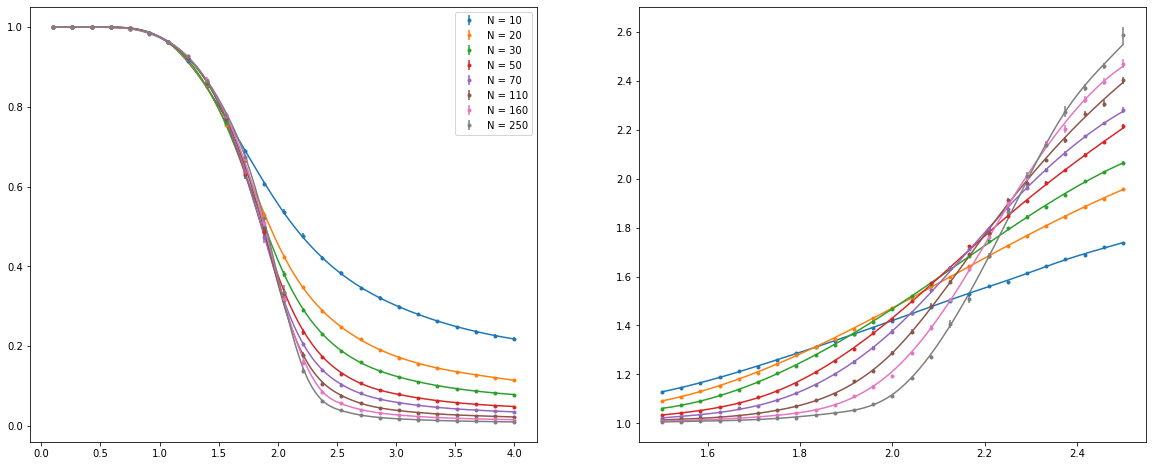

In [5]:
from FKMC.plotting import spread
from scipy.interpolate import interp1d, UnivariateSpline
from scipy.stats import sem

f, axes = plt.subplots(1,2, figsize = (20,8))
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
cmap = plt.get_cmap('viridis')

#Ns_to_keep = [10, 20, 30, 50, 80, 110, 180, 250]
BT_sel = slice(None, None, 1)
MT_sel = slice(None, None, 1)


d = Munch()

o = oTsweep_fullrange
axname = Munch(zip(o.hints.Mf_moments, count()))
print(axes)
print(o.Mf_moments.shape)

d.Ns = o.Ns
d.MX = o.Ts[MT_sel]
M2 = o.Mf_moments[..., MT_sel, 2]
d.M2 =  np.mean(M2, axis = axname.Rs)
d.dM2 = sem(M2, axis = axname.Rs)

o = oTsweep_binder
axname = Munch(zip(o.hints.Mf_moments, count()))
print(axes)
print(o.Mf_moments.shape)

d.BX = o.Ts[BT_sel]
B = o.Mf_moments[..., BT_sel, 4] / o.Mf_moments[..., BT_sel, 2]**2
d.B =  np.mean(B, axis = axname.Rs)
d.dB = sem(B, axis = axname.Rs)

for i, N in enumerate(d.Ns):
    #calculate the spline fits
    #some of the errors come out as zero so clamp to them a reasonable nonzero value
    #which I choose to be 10% of the mean error
    d.dM2[i] = np.maximum(d.dM2[i], d.dM2[i].mean() * 0.1)
    d.dB[i] = np.maximum(d.dB[i], d.dB[i].mean() * 0.1)
    
    M_interped = UnivariateSpline(d.MX, d.M2[i], w = 1/(d.dM2[i] + 0.01*max(d.dM2[i])), s = len(d.MX))
    binder_interped = UnivariateSpline(d.BX, d.B[i], w = 1/d.dB[i], s = len(d.BX))
    
    color = colors[i]
    
    #plot the full range of M squared
    axes[0].errorbar(d.MX, d.M2[i], yerr = d.dM2[i] * 2, color = color, linestyle = "None", marker = '.', label = f'N = {N}')
    
    x = np.linspace(d.MX[0], d.MX[-1], 200)
    axes[0].plot(x, M_interped(x), color = color)
    
    #spread(axes[0], d.MX, d.M2[i], d.dM2[i], alpha = 0.3, label = f'N = {N}', color = color)
    
    #plot the binder cumulant
    axes[1].errorbar(d.BX, d.B[i], yerr = d.dB[i], color = color, linestyle = "None", marker = '.')
    #axes[1].plot(d.BX, d.B[i], label = f'N = {N}', color = color)
    
    x = np.linspace(d.BX[0], d.BX[-1], 200)
    axes[1].plot(x, binder_interped(x), color = color)
    
#axes[1].set(xlim = (1.5, 2.5)    )
axes[0].legend()    
import pickle
outputfile = Path('~/HPC_data/pickled_data/binder_data.pickle').expanduser()
with open(outputfile, 'wb') as file: 
    pickle.dump(d.toDict(), file)

1